In [51]:
# Everybody's favorite imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [52]:
data = pd.read_csv("plays_4thdowns.csv")

# Getting the columns necessary
#newdata = data[["quarter", 'yardsToGo', 'yardlineNumber', 'defendersInTheBox', 
          #      'numberOfPassRushers', 'HomeScoreBeforePlay', 'HomeScoreAfterPlay', 'VisitorScoreBeforePlay',
          #     'VisitorScoreBeforePlay', 'isPenalty', 'PassLength', 'YardsAfterCatch', 'PlayResult',
          #     'firstDown_Conversion']]
#newdata.loc[:, 'isPenalty'] = newdata['isPenalty'].map({'False': 0, 'True': 1})
#newdata = newdata.dropna()


newdata = data

# Fixing up variables, the spacing between will represent each column
newdata['GameClock'] = pd.to_datetime(newdata['GameClock'], format='%H:%M:%S')
newdata['hour'] = newdata['GameClock'].dt.hour
newdata['minute'] = newdata['GameClock'].dt.minute
newdata['second'] = newdata['GameClock'].dt.second
newdata = newdata.drop('GameClock', axis=1)

newdata['isPenalty_binary'] = newdata['isPenalty'].map({False: 0, True: 1})
newdata = newdata.drop('isPenalty', axis=1)

dummies = pd.get_dummies(newdata['offenseFormation'], prefix='offenseFormation')
newdata = pd.concat([newdata, dummies], axis=1)
newdata = newdata.drop('offenseFormation', axis=1)

dummies2 = pd.get_dummies(newdata['yardlineSide'], prefix='yardlineSide')
newdata = pd.concat([newdata, dummies2], axis=1)
newdata = newdata.drop('yardlineSide', axis=1)

dummies3 = pd.get_dummies(newdata['personnel.offense'], prefix='personnel.offense')
newdata = pd.concat([newdata, dummies3], axis=1)
newdata = newdata.drop('personnel.offense', axis=1)

dummies4 = pd.get_dummies(newdata['personnel.defense'], prefix='personnel.defense')
newdata = pd.concat([newdata, dummies4], axis=1)
newdata = newdata.drop('personnel.defense', axis=1)

df = newdata
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,HomeScoreBeforePlay,VisitorScoreBeforePlay,HomeScoreAfterPlay,VisitorScoreAfterPlay,...,"personnel.defense_3 DL, 3 LB, 5 DB","personnel.defense_3 DL, 4 LB, 4 DB","personnel.defense_3 DL, 5 LB, 3 DB","personnel.defense_4 DL, 1 LB, 6 DB","personnel.defense_4 DL, 2 LB, 5 DB","personnel.defense_4 DL, 3 LB, 4 DB","personnel.defense_4 DL, 4 LB, 3 DB","personnel.defense_5 DL, 3 LB, 3 DB","personnel.defense_5 DL, 4 LB, 2 DB","personnel.defense_6 DL, 2 LB, 3 DB"
0,4,4,2,30.0,7.0,NaN,35,17,35,17,...,0,0,0,1,0,0,0,0,0,0
1,1,4,1,10.0,9.0,NaN,7,0,7,0,...,0,1,0,0,0,0,0,0,0,0
2,4,4,1,40.0,10.0,NaN,27,28,27,28,...,0,0,0,0,0,0,1,0,0,0
3,3,4,2,42.0,5.0,4.0,10,21,10,21,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,3.0,5.0,4.0,10,21,16,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,4,4,2,45.0,7.0,5.0,23,28,23,28,...,0,0,0,0,1,0,0,0,0,0
136,4,4,1,48.0,7.0,5.0,23,28,23,28,...,0,0,0,0,1,0,0,0,0,0
137,4,4,1,43.0,9.0,NaN,15,19,15,19,...,0,0,0,0,0,0,1,0,0,0
138,4,4,1,13.0,10.0,4.0,29,22,29,22,...,0,1,0,0,0,0,0,0,0,0


In [53]:
new_values = {'C': 1, 'I': 0, 'S': 0, np.nan: np.nan}  # Define new values for each existing value
df['PassResult'] = df['PassResult'].map(new_values)  # Map existing values to new values
df = df.drop('playDescription', axis=1)
df.dropna(inplace=True)
scaler = StandardScaler()


# Split the dataset into training and testing sets (70-30 split is ideal)
X_train, X_test, y_train, y_test = train_test_split(df.drop('firstDown_Conversion', axis=1), 
                                                    df['firstDown_Conversion'], test_size=0.3, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#non_numeric_columns = df.select_dtypes(exclude='number').columns
#non_numeric_columns

# Print the size of the training and testing sets
print(f"Training set size: {len(X_train_scaled)}\nTest set size: {len(X_test_scaled)}")

Training set size: 28
Test set size: 13


In [54]:
# Create a Logistic Regression object and fit the scaled training data

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict the response variable for the testing data and calculate accuracy score
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8461538461538461
Precision: 0.8461538461538461
Recall: 1.0


In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  2]
 [ 0 11]]


In [58]:
# Get the coefficients of each feature
coef = log_reg.coef_[0]

# Create a dictionary with feature names and their corresponding coefficients
coef_dict = dict(zip(X_train.columns, coef))

# Sort the dictionary by coefficient values in descending order
sorted_coef = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

# Print the sorted dictionary
print(sorted_coef)

{'yardlineSide_NO': -0.663080191881554, 'yardsToGo': -0.5864155148770015, 'yardlineSide_NYJ': -0.48652167653159495, 'yardlineSide_JAX': -0.4791007725472021, 'personnel.defense_2 DL, 4 LB, 5 DB': -0.47317704613492306, 'yardlineSide_GB': 0.4300455834993457, 'PassLength': 0.3919775022818737, 'HomeScoreBeforePlay': -0.3647943491460588, 'PlayResult': 0.362410111168562, 'HomeScoreAfterPlay': -0.3207265262776317, 'yardlineSide_LA': -0.31917575804748527, 'yardlineSide_OAK': -0.31207542856490694, 'quarter': -0.2758661079880094, 'minute': -0.27182323714451473, 'defendersInTheBox': 0.27121287400740846, 'yardlineSide_TEN': 0.2670734682749993, 'yardlineSide_ARI': 0.24635787786308205, 'personnel.offense_1 RB, 2 TE, 2 WR': -0.23900047027694063, 'offenseFormation_SHOTGUN': -0.17603834383182274, 'yardlineSide_ATL': 0.17585535761659826, 'yardlineSide_MIN': 0.16876831596532604, 'offenseFormation_PISTOL': 0.16433859031654732, 'personnel.defense_3 DL, 3 LB, 5 DB': 0.16424116635332417, 'personnel.defense_1 

This above output may look *slightly confusing*. This is a sorted dictionary (printed) that is putting the most correlated coefficients at the top. So we can see the most correlated predictor to the response is yardlineSide_NO.

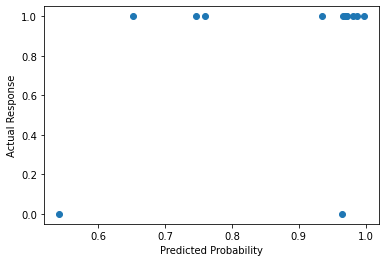

In [64]:
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
plt.scatter(y_prob, y_test)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Response')
plt.show()